In [1]:
from utils import *
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from ST3DCN_Utils import multi_scale_get_model_DCN

2023-06-17 15:59:07.929699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 15:59:08.051729: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-17 15:59:08.557193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/GPU/jllu/software/condaenv/tf211gpu/lib/
2023-06-17 15:59:08.557266: W tensorflo

In [45]:
# Read file
image_mask_files = np.load('./data/image.npy', allow_pickle=True)

In [46]:
image_mask_files[:,:]

array([['./data/mask/ID_0848_P3.nii.gz', './data/image/ID_0848_P3', 1, 1,
        0, 1],
       ['./data/mask/ID_0848_P2.nii.gz', './data/image/ID_0848_P2', 1, 1,
        0, 1],
       ['./data/mask/QEH032_P3.nii.gz', './data/image/QEH032_P3', 0, 0,
        0, 0],
       ['./data/mask/QEH032_P2.nii.gz', './data/image/QEH032_P2', 0, 0,
        0, 0]], dtype=object)

path:
/home/GPU/HCC_Orig_CT_All/PYN_Part2/Phase3_data/ID_0848_P3
/home/GPU/HCC_Orig_Mask_All/2023-02-20_updated_Mask/ID_0848_P3.nii.gz


ImageSeriesReader (0x28f841a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.001



shape of image and mask (512, 512, 251) (512, 512, 251)
end


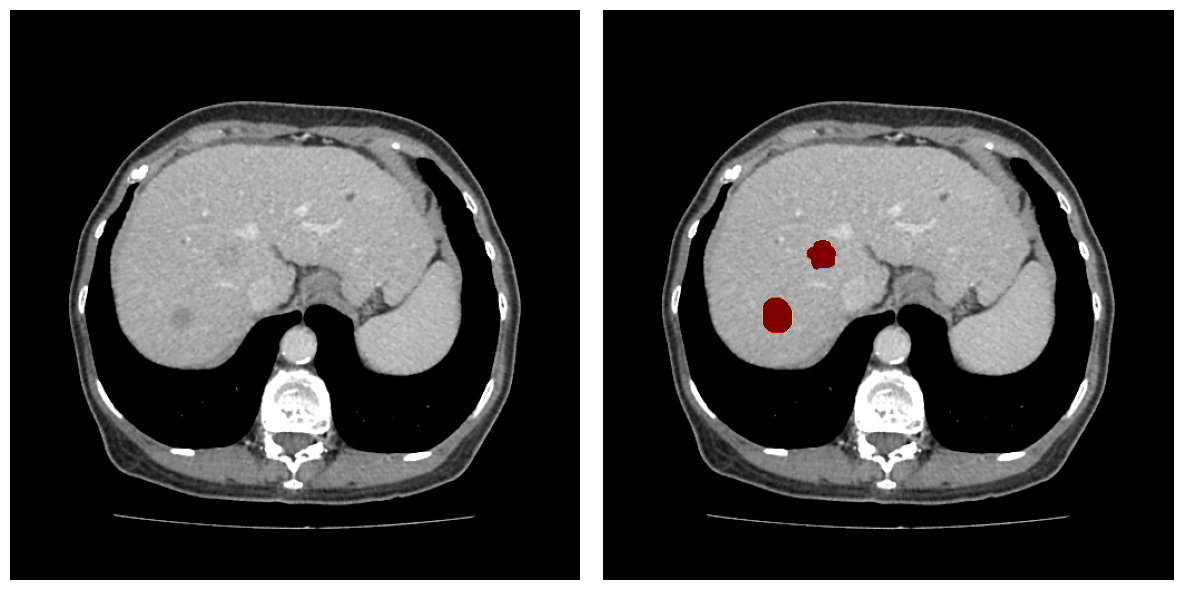

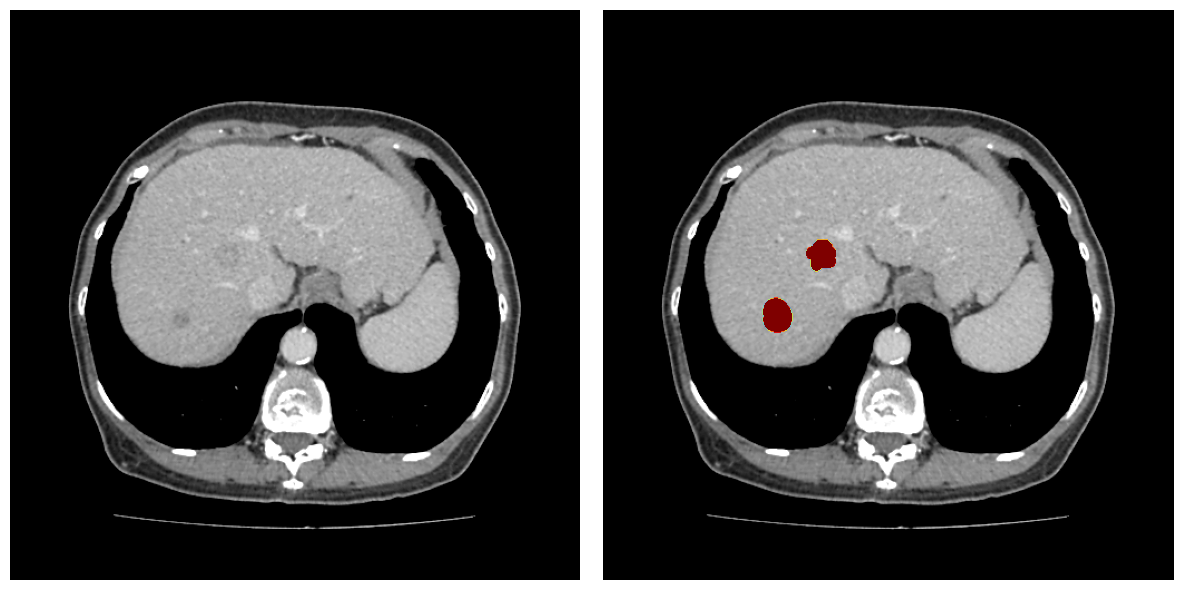

In [44]:
draw(image_mask_files, 0,190,192)

path:
./data/image/ID_0560_P3
./data/mask/ID_0560_P3.nii.gz


ImageSeriesReader (0x191602fd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.0010012



shape of image and mask (512, 512, 832) (512, 512, 832)
end


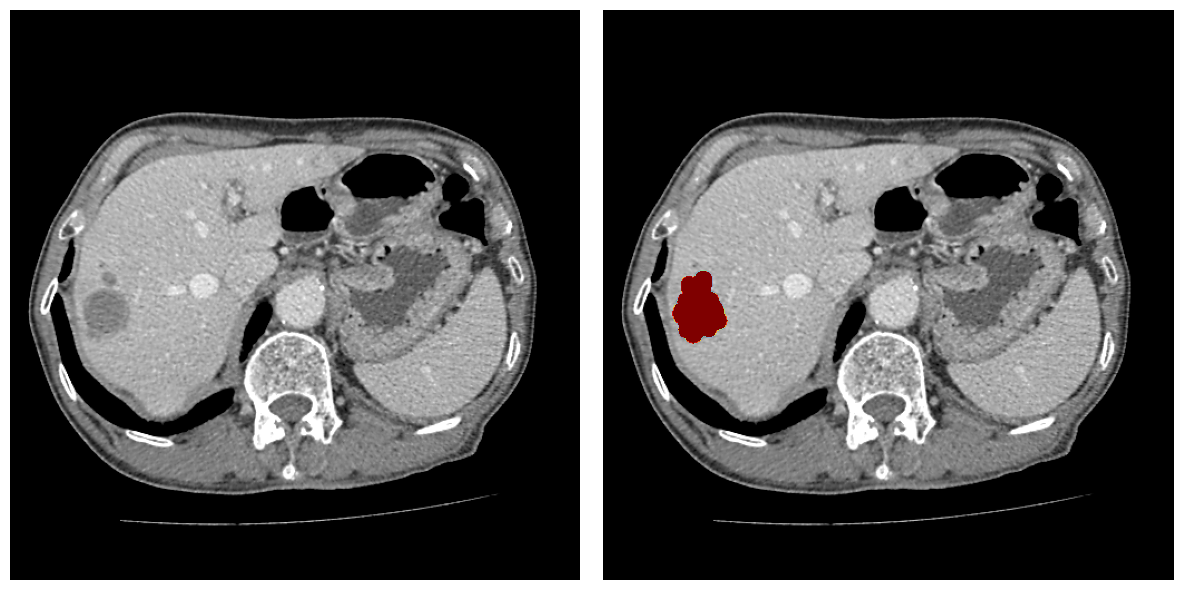

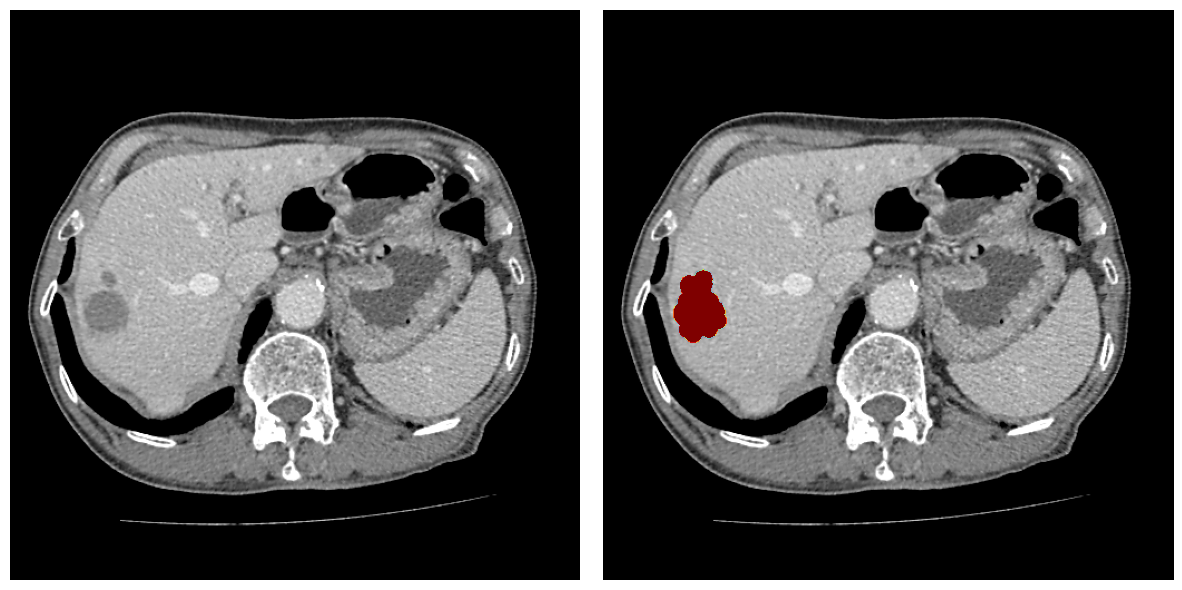

In [37]:
draw1(image_mask_files, 0,430,432)

path:
./data/image/QEH032_P3
./data/mask/QEH032_P3.nii.gz
shape of image and mask (512, 512, 419) (512, 512, 419)
end


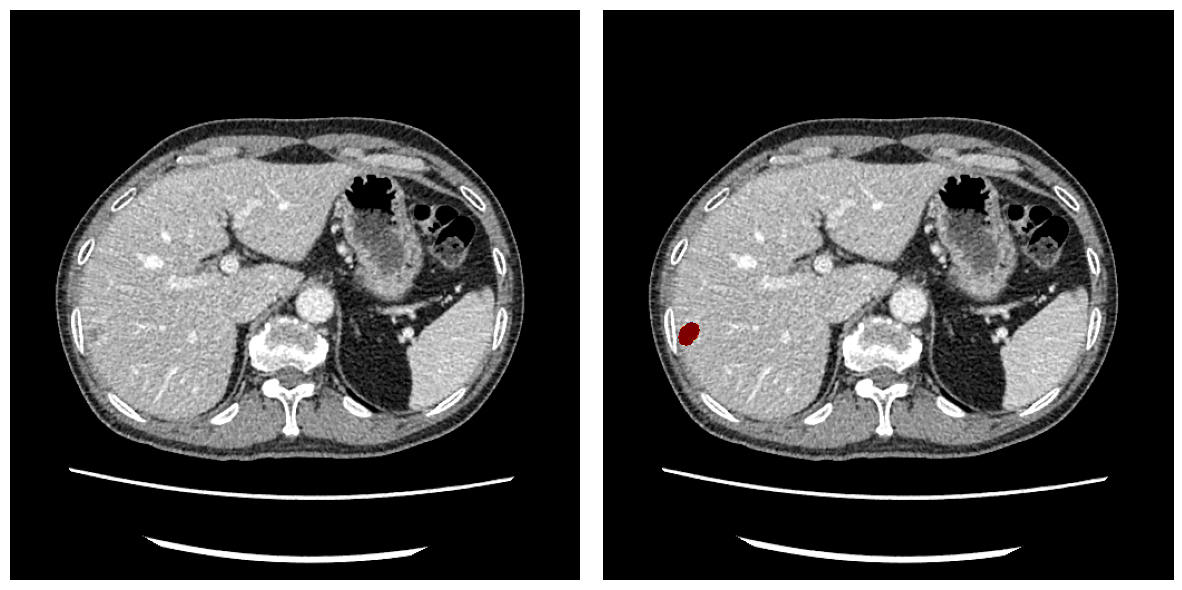

In [42]:
draw1(image_mask_files, 2,286,287)

In [47]:
width=70
height=70
depth = 70
factor=8
num_classes = 2
batch_size = 16
model = multi_scale_get_model_DCN(width=width, height=height, depth=depth, batch_size=batch_size, factor=factor, num_class=2)
model.load_weights(os.path.join('./weights','ST3DCN_Model.h5'))
image_mask_files1 = np.load('./data/data.npy', allow_pickle=True)

TensorShape([None, 70, 70, 70, 1]) TensorShape([None, 70, 70, 4]) 16 Line-252
TensorShape([None, 512]) ##1
TensorShape([None, 512]) TensorShape([None, 512]) Line-565


In [48]:
image_mask_files1[:,:]

array([['./data/mask/ID_0848_P3_0.npy', './data/image/ID_0848_P3_0.npy',
        1],
       ['./data/mask/ID_0848_P3_1.npy', './data/image/ID_0848_P3_1.npy',
        1],
       ['./data/mask/ID_0848_P2_0.npy', './data/image/ID_0848_P2_0.npy',
        1],
       ['./data/mask/ID_0848_P2_1.npy', './data/image/ID_0848_P2_1.npy',
        1],
       ['./data/mask/QEH032_P2_0.npy', './data/image/QEH032_P2_0.npy', 0],
       ['./data/mask/QEH032_P2_1.npy', './data/image/QEH032_P2_1.npy', 0],
       ['./data/mask/QEH032_P2_2.npy', './data/image/QEH032_P2_2.npy', 0],
       ['./data/mask/QEH032_P3_0.npy', './data/image/QEH032_P3_0.npy', 0],
       ['./data/mask/QEH032_P3_1.npy', './data/image/QEH032_P3_1.npy', 0],
       ['./data/mask/QEH032_P3_2.npy', './data/image/QEH032_P3_2.npy', 0]],
      dtype=object)

In [54]:
# predict HCC or non-HCC for a patient
id_lis, label_lis, predict_lis = predict_patient(model, image_mask_files, image_mask_files1)
for i in range(len(id_lis)):
    print(id_lis[i],label_lis[i],predict_lis[i] )
    

1/1 [==============================] - 0s 31ms/step
ID_0848 1 0.8930234313011169
QEH032 0 0.1020175920566544


In [50]:
# predict HCC or non-HCC for a lesion
id_lis, label_lis, predict_lis = predict_lesion(model, image_mask_files, image_mask_files1)
for i in range(len(id_lis)):
    print(id_lis[i],label_lis[i],predict_lis[i] )

1/1 [==============================] - 0s 34ms/step
ID_0848_0 1 0.9005912
ID_0848_1 1 0.8816718
QEH032_0 0 0.0059577017
QEH032_1 0 0.23815411
QEH032_2 0 0.15053022
